<a href="https://colab.research.google.com/github/amarabuco/deeplearning-2024.2/blob/main/Aula_1_Revis%C3%A3o_de_Redes_Neurais_Artificiais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning with PyTorch: A 60 Minute Blitz

https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

## Tensors

In [ ]:
import torch
import numpy as np

In [ ]:
data = [[1, 2],[3, 4]] # lista de listas
data

[[1, 2], [3, 4]]

In [ ]:
x_data = torch.tensor(data) # transforma lista em tensor
x_data

tensor([[1, 2],
        [3, 4]])

In [ ]:
np_array = np.array(data) # numpy array
np_array

array([[1, 2],
       [3, 4]])

In [ ]:
x_np = torch.from_numpy(np_array) # transforma np array em tensor
x_np

tensor([[1, 2],
        [3, 4]])

In [ ]:
x_ones = torch.ones_like(x_data) # usa o shape do tensor modelo e cria uma matriz de 1
x_ones

tensor([[1, 1],
        [1, 1]])

In [ ]:
x_rand = torch.rand_like(x_data, dtype=torch.float) # usa o shape do tensor modelo e cria uma matriz de números aleatórios com mesmo shape, precisa para tipo de dados como float para não dar erro ao criar os números aleatórios
x_rand


tensor([[0.8161, 0.6287],
        [0.7275, 0.4471]])

In [ ]:
shape = (2,3)
rand_tensor = torch.rand(shape) # funções direto do torch recebem o shape e criam matrizes pré-definidas (aleatoria, uns e zeros)
print(rand_tensor)
ones_tensor = torch.ones(shape)
print(ones_tensor)
zeros_tensor = torch.zeros(shape)
print(zeros_tensor)


tensor([[0.3951, 0.6973, 0.3535],
        [0.5808, 0.1967, 0.1507]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [ ]:
print(rand_tensor.shape) # ordem da matriz
print(rand_tensor.dtype) # tipo de dado
print(rand_tensor.device) # cpu ou gpu


torch.Size([2, 3])
torch.float32
cpu


In [ ]:
if torch.cuda.is_available(): # checa se tem gpu, com cuda. No Colab precisa ligar gpu.
  rand_tensor = rand_tensor.to('cuda')
  print(f"Device tensor is stored on: {rand_tensor.device}")

In [ ]:
tensor = torch.rand(4,4) # gera uma matriz aleatoria 4x4
print(tensor)
tensor[:, 1] = 0 # transforma a segunda coluna em zeros
print(tensor)

tensor([[0.9406, 0.7610, 0.6167, 0.4194],
        [0.3890, 0.4450, 0.6138, 0.0199],
        [0.3356, 0.0555, 0.6080, 0.0065],
        [0.6236, 0.9126, 0.3293, 0.1539]])
tensor([[0.9406, 0.0000, 0.6167, 0.4194],
        [0.3890, 0.0000, 0.6138, 0.0199],
        [0.3356, 0.0000, 0.6080, 0.0065],
        [0.6236, 0.0000, 0.3293, 0.1539]])


In [ ]:
t1 = torch.cat([tensor, tensor, tensor], dim=1) # Esse cat não é de gato, é de concat. Nesse caso, concatenou três cópias da matriz 4x4 gerada antes, por coluna, então virou 4x12.
print(t1.shape)
print(t1)

torch.Size([4, 12])
tensor([[0.9406, 0.0000, 0.6167, 0.4194, 0.9406, 0.0000, 0.6167, 0.4194, 0.9406,
         0.0000, 0.6167, 0.4194],
        [0.3890, 0.0000, 0.6138, 0.0199, 0.3890, 0.0000, 0.6138, 0.0199, 0.3890,
         0.0000, 0.6138, 0.0199],
        [0.3356, 0.0000, 0.6080, 0.0065, 0.3356, 0.0000, 0.6080, 0.0065, 0.3356,
         0.0000, 0.6080, 0.0065],
        [0.6236, 0.0000, 0.3293, 0.1539, 0.6236, 0.0000, 0.3293, 0.1539, 0.6236,
         0.0000, 0.3293, 0.1539]])


In [ ]:
m1 = tensor.mul(tensor) # não é mula, é MULtiplicação de matrizes
m2 = tensor * tensor # tb vale multiplicar como python, sem usar método do objeto tensor
print(m1 == m2)
print(m1)

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])
tensor([[8.8477e-01, 0.0000e+00, 3.8032e-01, 1.7590e-01],
        [1.5133e-01, 0.0000e+00, 3.7675e-01, 3.9503e-04],
        [1.1262e-01, 0.0000e+00, 3.6964e-01, 4.1629e-05],
        [3.8892e-01, 0.0000e+00, 1.0845e-01, 2.3683e-02]])


In [ ]:
# a multiplicação é element-wise, então se os shapes não forem compatíveis, dá erro.
torch.ones((2,2)) * torch.zeros((2,3)) # erro
torch.ones((2,2)) * torch.zeros((2,1)) # ok

RuntimeError: The size of tensor a (2) must match the size of tensor b (3) at non-singleton dimension 1

In [ ]:
mm1 = tensor.matmul(tensor) # matmul é o produto vetorial
mm2 = tensor @ tensor # não é e-mail, é dot product, que
print(mm1 == mm2)
print(mm1 == m1) # é diferente da multiplicação de matriz anterior
print(mm1)

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])
tensor([[False,  True, False, False],
        [False,  True, False, False],
        [False,  True, False, False],
        [False,  True, False, False]])
tensor([[1.3533, 0.0000, 1.0931, 0.4630],
        [0.5843, 0.0000, 0.6196, 0.1702],
        [0.5237, 0.0000, 0.5787, 0.1457],
        [0.7931, 0.0000, 0.6355, 0.2874]])


In [ ]:
print(tensor, '\n') # esse \n é só para dar um espaço no final da matriz
tensor.add(5)
print(tensor, '\n') # adicionou 5, mas não mudou o objeto
tensor.add_(5) # se usar "_" no final, ele altera o objeto
print(tensor) # adicionou e mudou o objeto

tensor([[5.9406, 5.0000, 5.6167, 5.4194],
        [5.3890, 5.0000, 5.6138, 5.0199],
        [5.3356, 5.0000, 5.6080, 5.0065],
        [5.6236, 5.0000, 5.3293, 5.1539]]) 

tensor([[5.9406, 5.0000, 5.6167, 5.4194],
        [5.3890, 5.0000, 5.6138, 5.0199],
        [5.3356, 5.0000, 5.6080, 5.0065],
        [5.6236, 5.0000, 5.3293, 5.1539]]) 

tensor([[10.9406, 10.0000, 10.6167, 10.4194],
        [10.3890, 10.0000, 10.6138, 10.0199],
        [10.3356, 10.0000, 10.6080, 10.0065],
        [10.6236, 10.0000, 10.3293, 10.1539]])


In [ ]:
t = torch.ones(5)
print(t) # pytorch
n = t.numpy()
print(n) # numpy

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


In [ ]:
t.add_(1) # adiciona um
print(t) # muda no pytorch
print(n) # e também muda no numpy, que na verdade é uma referência a variável original, nesse caso

tensor([3., 3., 3., 3., 3.])
[3. 3. 3. 3. 3.]


In [ ]:
# o contrario
n = np.ones(5)
t = torch.from_numpy(n) # torch.from_numpy, faz a conversão para o pytorch
print(n)
print(t)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [ ]:
np.add(n, 1, out=n) # esse out indica que é uma operação inplace
print(f"n: {n}") # mudou numpy
print(f"t: {t}") # tb mudou pytorch, que é referência

n: [2. 2. 2. 2. 2.]
t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [ ]:
# o contrario
n = np.ones(5)
t = torch.from_numpy(n).clone() # ao usar o clone, cria uma cópia, ao invés de fazer referência ao objeto original
np.add(n, 1, out=n)
print(n)
print(t)

[2. 2. 2. 2. 2.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


## Autograd

https://www.youtube.com/watch?v=tIeHLnjs5U8

In [ ]:
from torchvision.models import resnet18, ResNet18_Weights # importa a arquitetura e pesos da resnet18

In [ ]:
model = resnet18(weights=ResNet18_Weights.DEFAULT) # instancia a resnet18 carregando os pesos da rede

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 176MB/s]


In [ ]:
data = torch.rand(1, 3, 64, 64) # inventa uns dados para simular uma foto (1,) rgb(3,) 64 x 64 pixels (64, 64)
data

tensor([[[[0.8582, 0.3850, 0.6169,  ..., 0.8029, 0.8020, 0.1729],
          [0.4854, 0.6866, 0.5703,  ..., 0.5762, 0.7399, 0.0639],
          [0.6102, 0.3870, 0.9104,  ..., 0.6862, 0.5557, 0.4587],
          ...,
          [0.1816, 0.4391, 0.7796,  ..., 0.4471, 0.4407, 0.3530],
          [0.3328, 0.8274, 0.3542,  ..., 0.1631, 0.8381, 0.5090],
          [0.5808, 0.9042, 0.3840,  ..., 0.7490, 0.0020, 0.3011]],

         [[0.8943, 0.9706, 0.2829,  ..., 0.7858, 0.1497, 0.5147],
          [0.6899, 0.9505, 0.5659,  ..., 0.4044, 0.2584, 0.1395],
          [0.6866, 0.1504, 0.8257,  ..., 0.4539, 0.1231, 0.9203],
          ...,
          [0.0941, 0.9519, 0.2045,  ..., 0.7568, 0.5954, 0.5148],
          [0.8099, 0.0557, 0.3219,  ..., 0.9586, 0.1966, 0.3336],
          [0.0333, 0.9430, 0.0700,  ..., 0.3228, 0.0627, 0.2653]],

         [[0.5103, 0.4802, 0.3542,  ..., 0.7551, 0.0105, 0.1958],
          [0.4086, 0.1290, 0.8798,  ..., 0.5315, 0.6800, 0.0287],
          [0.6623, 0.4256, 0.1095,  ..., 0

In [ ]:
labels = torch.rand(1, 1000) # inventa um rótulo com mil classes para classificar a imagem inventada antes
labels

tensor([[8.0972e-01, 5.1464e-01, 2.2886e-01, 9.9186e-01, 3.6240e-01, 8.2000e-02,
         3.0253e-01, 5.9283e-01, 1.4192e-01, 1.5584e-02, 3.4069e-01, 2.6084e-01,
         1.7919e-01, 1.7035e-01, 8.0070e-01, 5.6581e-01, 8.4892e-01, 5.4282e-01,
         6.5222e-01, 1.5595e-01, 7.5117e-01, 6.3959e-01, 2.2850e-01, 5.6837e-01,
         1.2609e-01, 1.9565e-01, 6.9019e-01, 1.0270e-01, 1.1615e-01, 1.4306e-01,
         9.9981e-02, 5.6551e-01, 3.2140e-01, 2.0761e-01, 4.0483e-01, 1.8553e-02,
         3.4284e-01, 1.5289e-01, 6.4112e-01, 6.9543e-01, 7.3204e-01, 8.2373e-01,
         9.5255e-01, 8.7067e-01, 8.0365e-01, 1.3689e-01, 4.3356e-01, 5.4669e-01,
         4.1751e-02, 3.7997e-01, 3.6461e-01, 5.5288e-01, 7.6477e-01, 7.4355e-01,
         3.4412e-01, 5.8426e-01, 2.2479e-01, 3.5303e-02, 3.2348e-01, 9.4768e-01,
         4.4548e-01, 8.0020e-01, 1.8841e-01, 7.5670e-01, 2.3342e-01, 1.5386e-01,
         6.1433e-01, 3.5055e-01, 2.7264e-01, 8.1693e-01, 5.7861e-01, 6.0128e-01,
         7.4620e-01, 7.8098e

In [ ]:
prediction = model(data) # faz a previsão da foto aleatória usando a rede pré-treinada, como forward pass
print(prediction.shape)
print(prediction)

torch.Size([1, 1000])
tensor([[-0.7761, -0.4841, -0.7908, -1.5963, -0.6773, -0.2456, -0.5483,  0.2266,
          0.1542, -1.1067, -1.0288, -0.8318, -0.4752, -1.1472, -0.8700, -0.8466,
         -1.1601, -0.2471, -0.5057, -0.6737, -1.7285, -1.0179, -1.7389, -0.0248,
         -1.1699, -1.2808, -0.9797, -1.3643, -1.0006, -0.3501, -0.5878, -0.7036,
         -0.3761, -1.0004, -0.6164, -0.7526,  0.4291, -0.9639, -0.4597, -0.3621,
         -0.6966, -1.0790, -1.4024, -0.5749, -0.9960, -0.6813, -0.7579, -0.7068,
         -1.6228, -1.3403, -0.6676,  0.4201, -0.7174, -1.1440, -0.7079, -1.3760,
         -0.6467, -1.8835, -0.6505, -0.7836,  0.3096, -0.0815, -0.4271, -0.0883,
         -0.9174, -0.6807, -0.7391, -0.7376, -1.2388, -1.1011, -1.6062, -0.3521,
         -1.1112, -0.0780, -0.8829, -1.2417, -0.0330, -0.6004,  0.2606,  0.0224,
         -0.8986, -1.8133, -0.1191, -1.0514, -0.6282, -0.4467, -0.1402,  0.3284,
         -0.1420, -0.8514, -1.5333, -1.3048, -1.9912, -0.5192, -0.0818, -2.3346,
      

In [ ]:
loss = (prediction - labels).sum() # calcula o erro entre a previsão e o rótulo
loss # o resultado mostra o erro total considerando todas as mil classes, e também a função gradiente da rede para fazer o backward pass

tensor(-495.2192, grad_fn=<SumBackward0>)

In [ ]:
loss.backward() # realiza o backpropagation

<ipython-input-99-703dcf80ded4>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  loss.grad


In [ ]:
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9) # após cálcular os gradientes para cada parâmetro da rede, é preciso de um otimizador para ajustar o pesos na direção de minimizar o erro
print(model.parameters()) # conjunto de parametros para iterar com o otimizador
print(optim)

<generator object Module.parameters at 0x7e68f629f8b0>
SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)


In [ ]:
optim.step() # roda o otimizador

In [ ]:
prediction = model(data) # faz a previsão da foto aleatória usando a rede pré-treinada, como forward pass
loss = (prediction - labels).sum()
print(loss) # nova loss após o backprop

tensor(-9618.5059, grad_fn=<SumBackward0>)


### Differentiation in Autograd

In [ ]:
a = torch.tensor([2., 3.], requires_grad=True) # gera um vetor com dois valores
b = torch.tensor([6., 4.], requires_grad=True) # gera outro vetor com dois valores

In [ ]:
Q = 3 * a ** 3 - b ** 2 # cria uma função usando esses vetores, por exemplo: 3 x o cubo da nota - o quadro do tempo = qualificação da prova

In [ ]:
external_grad = torch.tensor([1., 1.]) # pode executar em cima de um vetor exogeno
Q.backward(gradient=external_grad)

In [ ]:
Q.sum().backward() # ou pode executar a partir de um operação que gera um vetor

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [ ]:
print(a.grad)
print(b.grad)

tensor([36., 81.])
tensor([-12.,  -8.])


In [ ]:
print(9*a**2 == a.grad) # 9*a*2 é a derivada parcial de (3 * a ** 3)
print(-2*b == b.grad) # -*b é a derivada parcial de (-b ** 2)

tensor([True, True])
tensor([True, True])


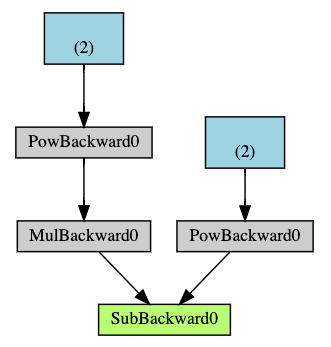

A variável "a" recebe duas operações, multiplicação e exponenciação, o ramo esquerdo da dag do autograd, enquanto a variável "b" só a exponenciação, o ramo direito.

In [ ]:
x = torch.rand(5, 5)
y = torch.rand(5, 5)
z = torch.rand((5, 5), requires_grad=True) # basta uma variável ter o requires_grad, que já funciona para toda a função

In [ ]:
a = x + y
print(a) # sem z, sem grad

tensor([[0.8889, 0.9761, 0.7513, 1.7335, 1.1430],
        [0.5002, 0.7103, 1.0294, 1.4617, 1.1014],
        [0.7412, 1.1287, 1.2317, 0.5068, 1.4506],
        [0.1265, 1.5103, 1.5998, 0.9694, 0.8138],
        [0.9165, 1.6642, 0.9558, 1.1758, 1.5002]])
False


In [ ]:
b = x + z # com z, com grad
print(b)

tensor([[1.5950, 0.6901, 0.9055, 1.2670, 0.9565],
        [0.9701, 1.0836, 0.9896, 1.2678, 1.4646],
        [1.1001, 0.8376, 1.3672, 0.3762, 0.6150],
        [0.7472, 0.8308, 1.0504, 1.1554, 1.2311],
        [1.3858, 1.1044, 1.2891, 0.6320, 0.9666]], grad_fn=<AddBackward0>)


In [ ]:
from torch import nn, optim

model = resnet18(weights=ResNet18_Weights.DEFAULT)

# Congela todos os parâmetros para não sofrer mudanças com o autograd, essa rede não muda.
for param in model.parameters():
    param.requires_grad = False

In [ ]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
model.fc = nn.Linear(512, 10) # cria uma nova camada de saída com 10 classes, que não está congelada, e substitui a original de 1000 classes

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

In [ ]:
optimizer.step()

In [ ]:
torch.no_grad() # também congela os pesos

## Neural Networks

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

### Construção da rede

In [2]:
# Cria uma CNN

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, input):
        # Convolution layer C1: 1 input image channel, 6 output channels,
        # 5x5 square convolution, it uses RELU activation function, and
        # outputs a Tensor with size (N, 6, 28, 28), where N is the size of the batch
        c1 = F.relu(self.conv1(input))
        # Subsampling layer S2: 2x2 grid, purely functional,
        # this layer does not have any parameter, and outputs a (N, 6, 14, 14) Tensor
        s2 = F.max_pool2d(c1, (2, 2))
        # Convolution layer C3: 6 input channels, 16 output channels,
        # 5x5 square convolution, it uses RELU activation function, and
        # outputs a (N, 16, 10, 10) Tensor
        c3 = F.relu(self.conv2(s2))
        # Subsampling layer S4: 2x2 grid, purely functional,
        # this layer does not have any parameter, and outputs a (N, 16, 5, 5) Tensor
        s4 = F.max_pool2d(c3, 2)
        # Flatten operation: purely functional, outputs a (N, 400) Tensor
        s4 = torch.flatten(s4, 1)
        # Fully connected layer F5: (N, 400) Tensor input,
        # and outputs a (N, 120) Tensor, it uses RELU activation function
        f5 = F.relu(self.fc1(s4))
        # Fully connected layer F6: (N, 120) Tensor input,
        # and outputs a (N, 84) Tensor, it uses RELU activation function
        f6 = F.relu(self.fc2(f5))
        # Gaussian layer OUTPUT: (N, 84) Tensor input, and
        # outputs a (N, 10) Tensor
        output = self.fc3(f6)
        return output


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


### Previsão

In [6]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


In [8]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.0127,  0.0854,  0.0651, -0.0727, -0.0246,  0.0197,  0.0747,  0.0348,
          0.1324, -0.1191]], grad_fn=<AddmmBackward0>)


In [12]:
out.argmax() # identifica a classe com maior probabilidade

tensor(8)

In [13]:
net.zero_grad()
out.backward(torch.randn(1, 10))

### Aprendizado

In [14]:
output = net(input) # faz a previsão
target = torch.randn(10)  # define uma classe aleatoria para a entrada aleatoria
target = target.view(1, -1)  # converte o vetor de classes anterior em um vetor de saída da rede
criterion = nn.MSELoss() # define a função de perda como MSE

loss = criterion(output, target) # calcula o função de perda da previsão
print(loss)

tensor(1.4934, grad_fn=<MseLossBackward0>)


In [17]:
#Backpropagation steps

print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

In [18]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
None
conv1.bias.grad after backward
tensor([ 0.0058,  0.0167,  0.0008, -0.0239,  0.0324, -0.0127])


In [20]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

### Otimização

In [21]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=0.01) # define o algoritmo de otimização

optimizer.zero_grad()   # zera os gradientes do autograd
output = net(input) # executa passo para frente
loss = criterion(output, target) # calcula a perda
loss.backward() # executa passo para trás
optimizer.step() # atualiza os pesos

## Training a Classifier

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [3]:
batch_size = 4

In [4]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

Files already downloaded and verified


In [10]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

In [11]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

Files already downloaded and verified


In [12]:
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)


In [13]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [14]:
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# functions to show an image

def show_image(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [16]:
# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(images)
print(labels)

tensor([[[[ 0.6941,  0.7882,  0.3725,  ...,  0.9843,  0.9765,  0.9843],
          [-0.1765, -0.1451, -0.1765,  ...,  0.9843,  0.9686,  0.9765],
          [-0.0196, -0.0745, -0.2000,  ...,  0.9922,  0.9843,  0.9843],
          ...,
          [ 0.0588,  0.0510,  0.0824,  ...,  0.1686,  0.1137,  0.0824],
          [ 0.1373,  0.1137,  0.1137,  ...,  0.1451,  0.1451,  0.1294],
          [ 0.0745,  0.0745,  0.0745,  ...,  0.1294,  0.1216,  0.1137]],

         [[ 0.6941,  0.7804,  0.3098,  ...,  0.9843,  0.9843,  1.0000],
          [-0.2471, -0.1686, -0.2235,  ...,  0.9765,  0.9765,  1.0000],
          [-0.1373, -0.1216, -0.2471,  ...,  0.9922,  0.9922,  1.0000],
          ...,
          [ 0.0118,  0.0039,  0.0353,  ...,  0.1294,  0.0745,  0.0431],
          [ 0.0902,  0.0667,  0.0667,  ...,  0.1059,  0.1059,  0.0902],
          [ 0.0275,  0.0275,  0.0275,  ...,  0.0902,  0.0824,  0.0667]],

         [[ 0.6784,  0.7647,  0.3176,  ...,  0.9843,  0.9765,  1.0000],
          [-0.2392, -0.1765, -

In [17]:
print(images[0].shape) # imagem de 32x32x3

torch.Size([3, 32, 32])


In [18]:
print(images.shape) # quatro imagens de 32x32x3
print(torchvision.utils.make_grid(images).shape) # quadro

torch.Size([4, 3, 32, 32])
torch.Size([3, 36, 138])


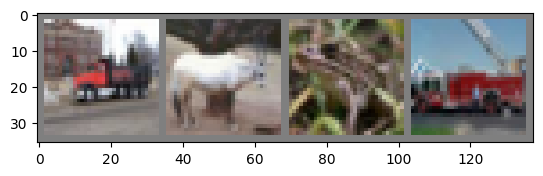

truck horse frog  truck


In [19]:
# show images
show_image(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

### Define a Convolutional Neural Network

In [20]:
import torch.nn as nn
import torch.nn.functional as F

In [22]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [23]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [28]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [30]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')
print('CPU: 3m33s')
print('GPU: 1m51s')

[1,  2000] loss: 2.191
[1,  4000] loss: 1.876
[1,  6000] loss: 1.686
[1,  8000] loss: 1.593
[1, 10000] loss: 1.518
[1, 12000] loss: 1.462
[2,  2000] loss: 1.411
[2,  4000] loss: 1.369
[2,  6000] loss: 1.349
[2,  8000] loss: 1.312
[2, 10000] loss: 1.290
[2, 12000] loss: 1.280
Finished Training
CPU: 3m33s
GPU: 2m28s


In [31]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

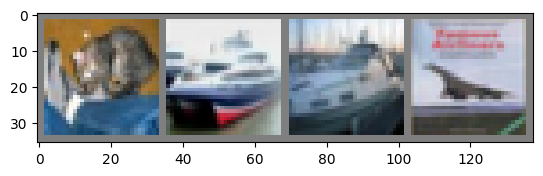

GroundTruth:  cat   ship  ship  plane


In [32]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
show_image(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [33]:
net = Net()
net.load_state_dict(torch.load(PATH, weights_only=True))

<All keys matched successfully>

In [34]:
outputs = net(images)

In [35]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  bird  ship  ship  plane


In [36]:
correct = 0
total = 0

with torch.no_grad(): # since we're not training, we don't need to calculate the gradients for our outputs
    for data in testloader:
        images, labels = data

        outputs = net(images) # calculate outputs by running images through the network

        _, predicted = torch.max(outputs.data, 1) # the class with the highest energy is what we choose as prediction
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 53 %


In [37]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}


with torch.no_grad(): # again no gradients needed
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 54.2 %
Accuracy for class: car   is 50.7 %
Accuracy for class: bird  is 60.9 %
Accuracy for class: cat   is 37.5 %
Accuracy for class: deer  is 46.2 %
Accuracy for class: dog   is 41.1 %
Accuracy for class: frog  is 63.5 %
Accuracy for class: horse is 52.7 %
Accuracy for class: ship  is 58.6 %
Accuracy for class: truck is 73.9 %


### Training on GPU

In [38]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [39]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')
print('CPU: 3m33s')
print('GPU: 1m51s')